# Modelo para el puerto de Newark

## Carga de datos

In [1]:
import pandas as pd
import numpy as np

In [35]:
six_ports = pd.read_csv('../sources/seis_puertos_usa_brutos.csv')

In [36]:
newark_data_transformed = six_ports.loc[six_ports['Hub Portuario'] == 'Newark/New York']

In [40]:
# Create a new dataframe by copying the existing one
newark_data_transformed = newark_data_transformed.copy()

# Apply the logarithmic transformation to the 'Sum_of_Counts', 'Total Imports', and 'Empty Imports' variables
newark_data_transformed['Sum_of_Counts'] = np.log(newark_data_transformed['Sum_of_Counts'])
newark_data_transformed['Total Imports'] = np.log(newark_data_transformed['Total Imports'])
newark_data_transformed['Empty Imports'] = np.log(newark_data_transformed['Empty Imports'])

### Estandarizar variables:

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.compose import ColumnTransformer

In [42]:
# Reorder columns
columns_order = ['Date'] + [col for col in newark_data_transformed.columns if col not in ['Date', 'Hub Portuario']] + ['Hub Portuario']
newark_data_transformed = newark_data_transformed[columns_order]

In [43]:
newark_data_transformed.drop(['Unnamed: 0'], axis=1, inplace=True)

In [44]:
numeric_columns = newark_data_transformed.select_dtypes(include=['float64']).columns
date = newark_data_transformed['Date']

# Define the pipeline
# Define the transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, ['Hub Portuario'])
    ]
)

# Define the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the pipeline to the numeric columns
standardized_data = newark_data_transformed.copy()
standardized_data = pipeline.fit_transform(standardized_data)


In [45]:
# Convert the processed data back into a pandas DataFrame
standardized_data = pd.DataFrame(standardized_data, columns=numeric_columns.tolist() + ['Hub Portuario'])

# Add the 'Date' column back to the processed DataFrame
standardized_data['Date'] = date.values

# Reorder the columns to match the original DataFrame structure
standardized_data = standardized_data[['Date'] + numeric_columns.tolist() + ['Hub Portuario']]

In [46]:
standardized_data['Hub Portuario_name'] = 'Newark/New York'

In [47]:
standardized_data

,Date,Empty Exports,Loaded Exports,Empty Imports,Loaded Imports,Total TEUs,Total Imports,Total Exports,latitude,longitude,...,Ratio_Fentanyl,Ratio_Heroin,Ratio_Ketamine,Ratio_Khat (Catha Edulis),Ratio_Lsd,Ratio_Marijuana,Ratio_Methamphetamine,Ratio_Other Drugs**,Hub Portuario,Hub Portuario_name
0,2018-10,-0.888607,1.765540,-0.505086,-0.299204,-0.272978,-0.281524,-0.453395,0.0,1.421085e-14,...,-0.193288,0.512738,-0.356296,-0.425835,1.628639,-0.524266,-0.207027,6.404878,0.0,Newark/New York
1,2018-11,-1.419778,0.277917,-0.052888,-1.146178,-1.042957,-0.780699,-1.341281,0.0,1.421085e-14,...,0.127320,-0.148423,-0.889422,-0.509518,-0.097004,-0.435555,-0.210684,-0.328368,0.0,Newark/New York
2,2018-12,-1.172381,0.327482,-0.672331,-0.798518,-0.780460,-0.577668,-1.083792,0.0,1.421085e-14,...,0.332809,-0.103470,-0.890477,-0.661162,1.227844,-0.503504,-0.208782,-0.397269,0.0,Newark/New York
3,2019-01,-0.999608,-0.068844,-0.745009,-0.574017,-0.645239,-0.444250,-1.008506,0.0,1.421085e-14,...,-0.345447,-0.149570,-0.201097,-0.661162,0.490080,-0.447139,-0.206104,-0.454215,0.0,Newark/New York
4,2019-02,-1.164784,0.078786,6.003847,-1.287497,-1.029210,5.438340,-1.136581,0.0,1.421085e-14,...,-0.383128,0.530809,-0.674769,-0.571224,-0.114536,-0.490009,-0.200797,-0.448307,0.0,Newark/New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2024-08,1.222420,0.395343,0.080584,0.955317,1.085826,0.389994,1.308779,0.0,1.421085e-14,...,-0.339257,-0.199886,0.682348,-0.183636,-0.786405,-0.234348,5.657233,0.123054,0.0,Newark/New York
71,2024-09,1.246679,0.589343,-0.046217,0.637567,0.968232,0.229281,1.379909,0.0,1.421085e-14,...,-0.383128,-0.174685,0.200792,-0.661162,6.877333,-0.028550,-0.215186,1.467423,0.0,Newark/New York
72,2024-10,0.259127,-2.433436,-0.623280,0.610886,0.195865,0.205331,-0.333187,0.0,1.421085e-14,...,-0.376668,-0.199431,-0.380963,-0.088131,-0.678498,0.450883,-0.211613,0.376978,0.0,Newark/New York
73,2024-11,0.375713,1.063501,-0.373409,0.005811,0.343989,-0.109320,0.630760,0.0,1.421085e-14,...,-0.383128,-0.199886,0.767742,-0.423344,-0.004085,0.573101,-0.101044,0.421672,0.0,Newark/New York


### Guardar fichero csv creado:

In [48]:
standardized_data.to_csv('../sources/newark_transformado.csv')

## Visualizaciones Gráficas

In [26]:
# Select columns related to containers
container_columns = ['Empty Exports', 'Loaded Exports', 'Empty Imports', 'Loaded Imports', 'Total TEUs', 'Total Imports', 'Total Exports']
container_data = standardized_data[['Date'] + container_columns + ['Hub Portuario_name']]

# Display the first few rows of the container data
container_data.head()

,Date,Empty Exports,Loaded Exports,Empty Imports,Loaded Imports,Total TEUs,Total Imports,Total Exports,Hub Portuario_name
0,2018-10,-0.888607,1.765540,-0.167279,-0.299204,-0.272978,-0.258520,-0.453395,Newark/New York
1,2018-11,-1.419778,0.277917,-0.161663,-1.146178,-1.042957,-0.524920,-1.341281,Newark/New York
2,2018-12,-1.172381,0.327482,-0.168783,-0.798518,-0.780460,-0.420247,-1.083792,Newark/New York
3,2019-01,-0.999608,-0.068844,-0.169361,-0.574017,-0.645239,-0.348750,-1.008506,Newark/New York
4,2019-02,-1.164784,0.078786,7.061567,-1.287497,-1.029210,6.445916,-1.136581,Newark/New York


In [29]:
# Combine container_data with the 'Sum_of_Counts' column from standardized_data
combined_data = container_data.copy()
combined_data['Sum_of_Counts'] = standardized_data['Sum_of_Counts'].values

# Display the first few rows of the new dataframe
combined_data.head()

,Date,Empty Exports,Loaded Exports,Empty Imports,Loaded Imports,Total TEUs,Total Imports,Total Exports,Hub Portuario_name,Sum_of_Counts
0,2018-10,-0.888607,1.765540,-0.167279,-0.299204,-0.272978,-0.258520,-0.453395,Newark/New York,-1.872501
1,2018-11,-1.419778,0.277917,-0.161663,-1.146178,-1.042957,-0.524920,-1.341281,Newark/New York,-1.428250
2,2018-12,-1.172381,0.327482,-0.168783,-0.798518,-0.780460,-0.420247,-1.083792,Newark/New York,-1.711084
3,2019-01,-0.999608,-0.068844,-0.169361,-0.574017,-0.645239,-0.348750,-1.008506,Newark/New York,-0.886383
4,2019-02,-1.164784,0.078786,7.061567,-1.287497,-1.029210,6.445916,-1.136581,Newark/New York,-1.181857


In [ ]:
from plotnine import ggplot, aes, geom_point, facet_wrap, labs

# Melt the dataframe to long format for easier plotting
combined_data_melted = combined_data.melt(id_vars=['Date', 'Hub Portuario_name', 'Sum_of_Counts'], 
                                          var_name='Variable', value_name='Value')

# Create the scatter plot
plot = (ggplot(combined_data_melted, aes(x='Value', y='Sum_of_Counts')) +
        geom_point() +
        facet_wrap('~Variable', scales='free_x') +
        labs(title='Scatter plot of numeric variables against Sum_of_Counts'))

<ggplot: (640 x 480)>


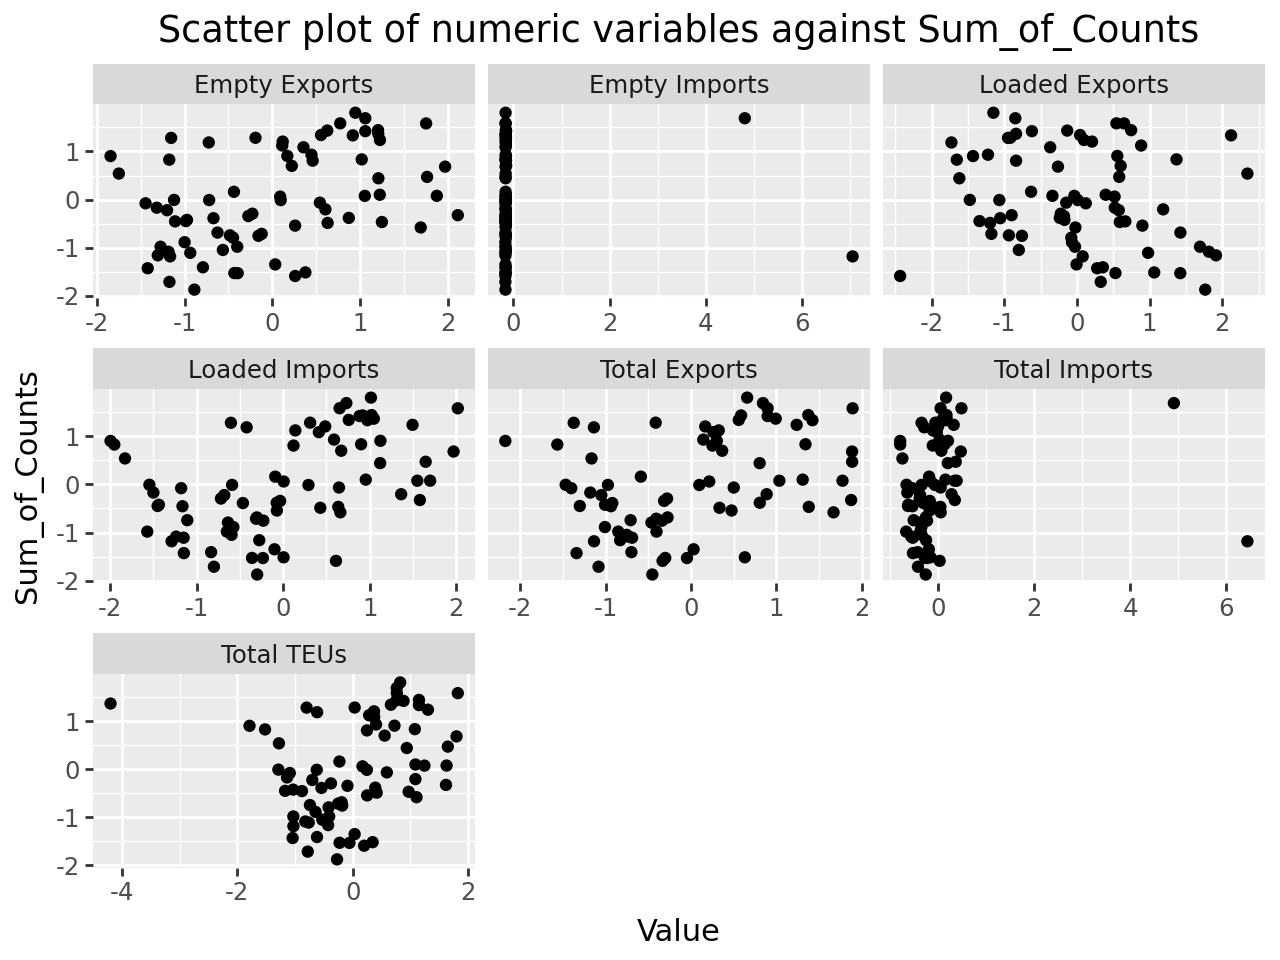

In [32]:
plot

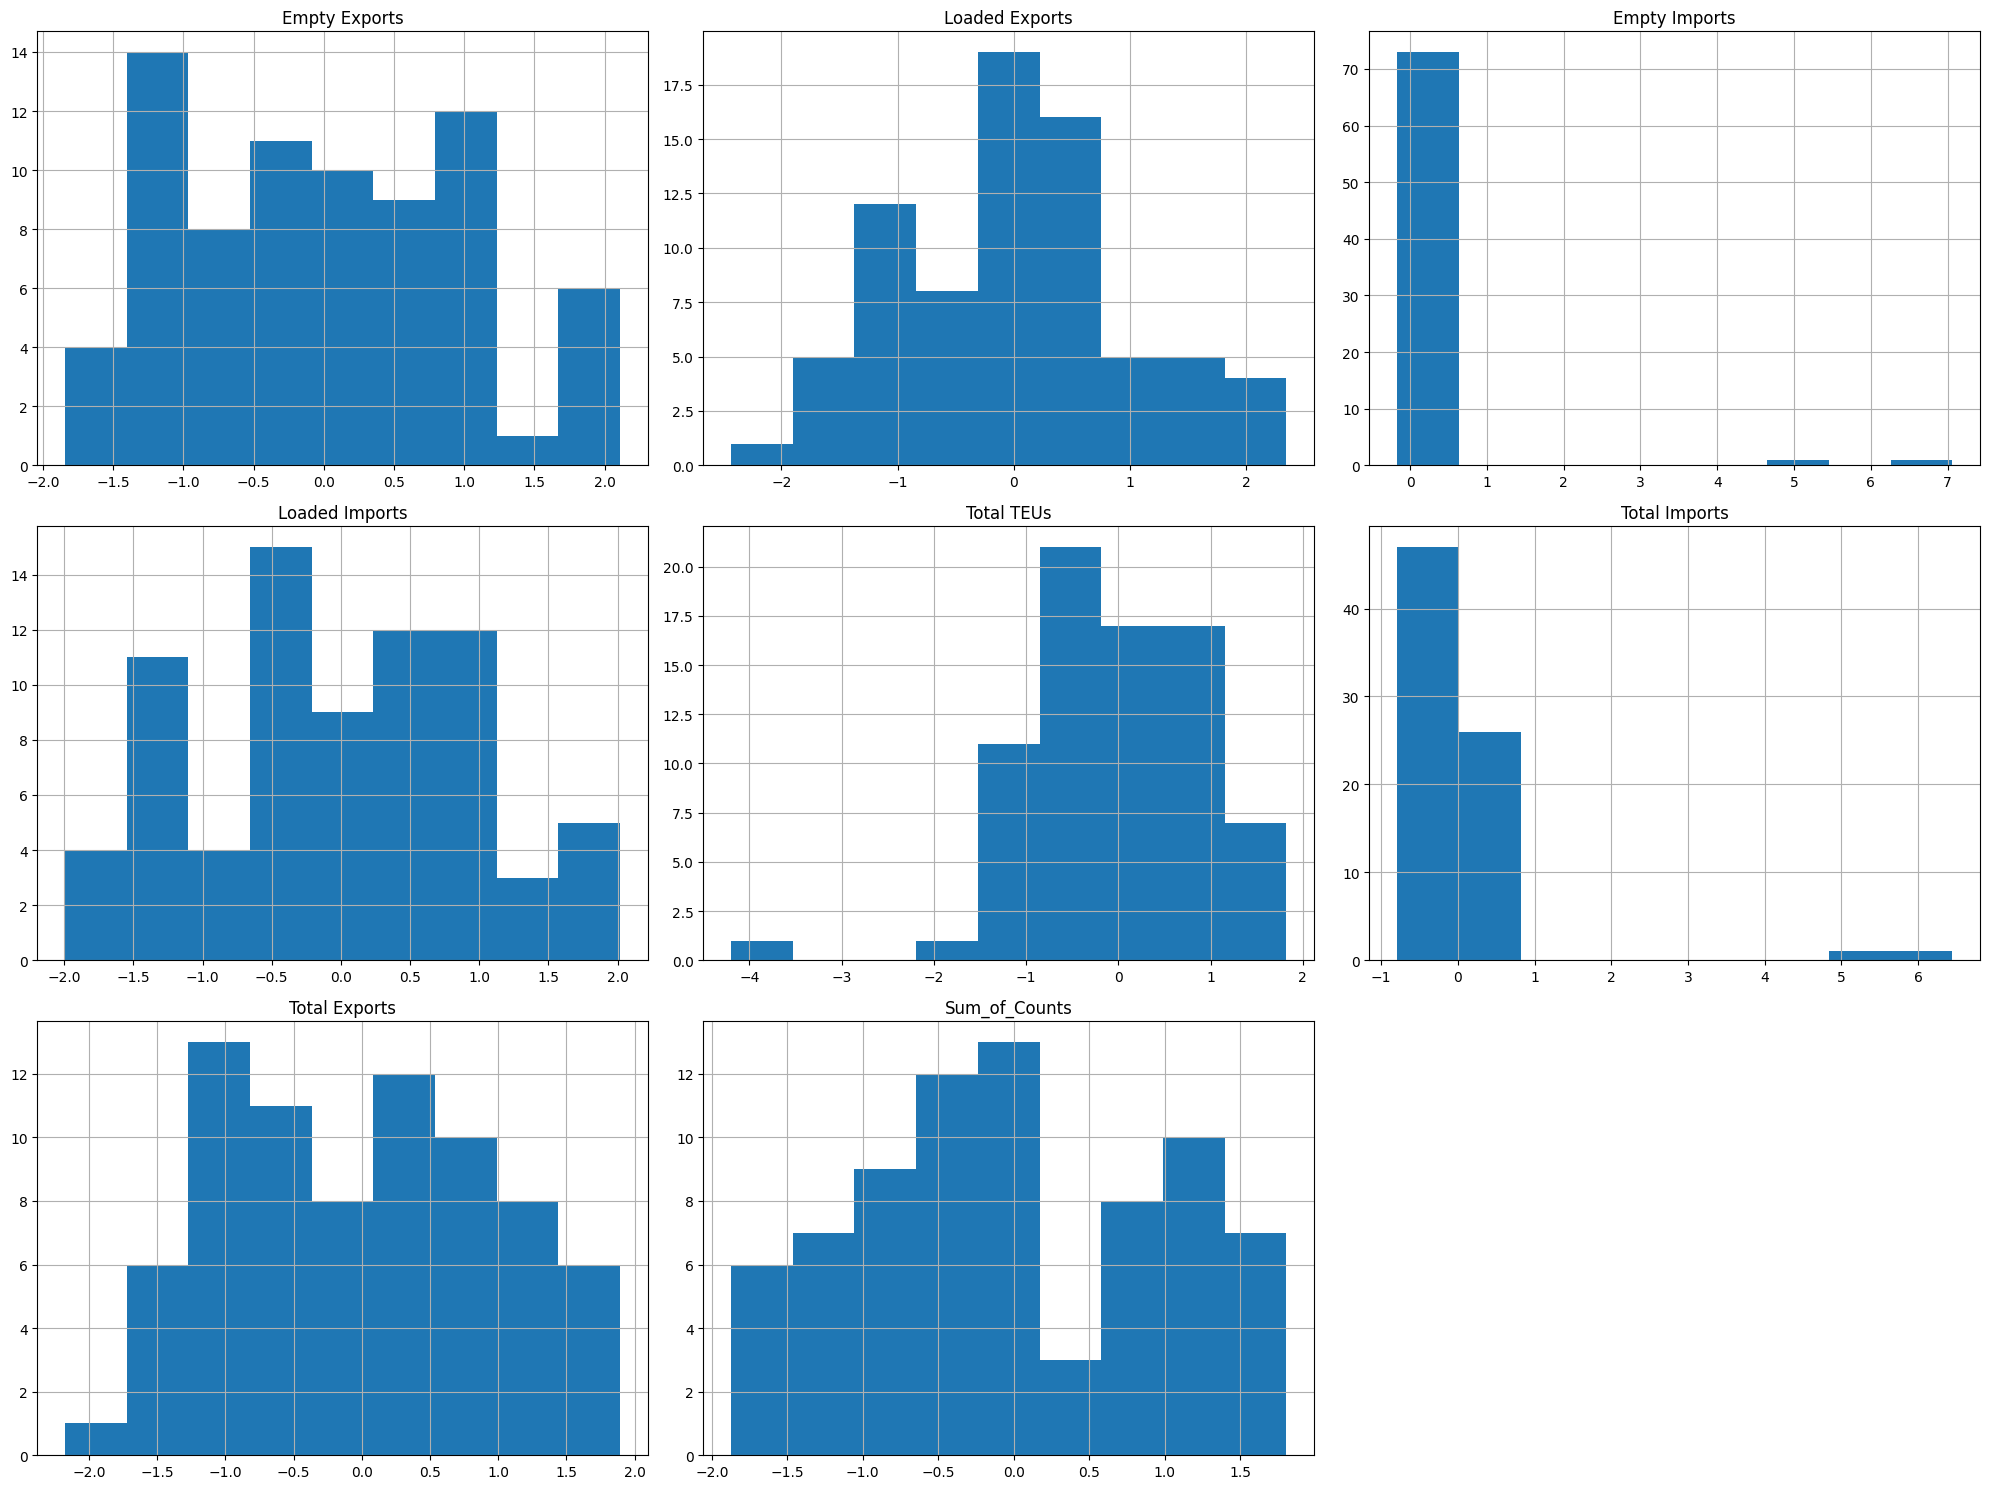

In [34]:
import matplotlib.pyplot as plt

# Generate histograms for numeric variables
combined_data.hist(bins=9, figsize=(20, 15))
plt.tight_layout()
plt.show()